# 선형 회귀(Linear Regression)
---
**선형 회귀**(Linear Regression): 하나 이상의 특성과 <U>연속적인 타깃 변수</U> 사이의 관계를 모델링함
- **단변량 선형 회귀**: 하나의 특성(설명 변수 $x$)과 연속적인 타깃(응답 변수 $y$) 사이의 관계를 모델링함<br>
$y = w_{0} + w_{1}x$<br>
여기서 $w_{0}$: y축 절편, $w_{1}$: 특성의 가중치
- **다변량 선형 회귀**: 여러 개의 특성이 있는 경우(일반화)<br>
$y = w_{0}x_{0} + w_{1}x_{1}+...+w_{m}x_{m}$<br>
여기서 $w_{0}$: y축 절편, $x_{0}=1$

# 지도 학습(회귀) 실습
---
**데이터셋**: 가상 데이터

**선형 회귀**(Linear Regression)

### 필요한 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비
- `np.random.normal(평균, 표준편차, 개수)`

In [2]:
num = 51

X = np.linspace(0, 10, num)
y = X + np.random.normal(1, 2, num)

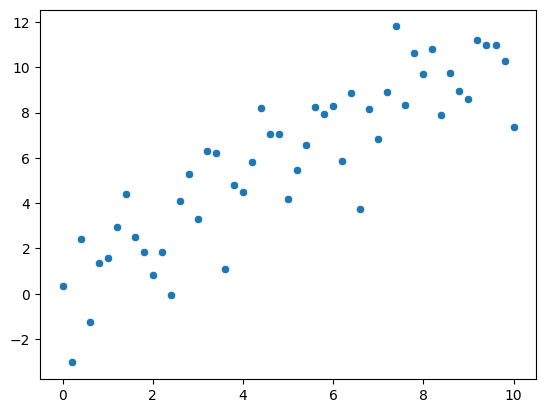

In [3]:
sns.scatterplot(x=X, y=y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(40,) (11,)
(40,) (11,)


In [5]:
# 1차원 데이터
X_train[:10]

array([1.6, 9.8, 1.2, 9.4, 0.8, 7.2, 6.6, 3.8, 9.6, 3. ])

In [6]:
# 2차원 데이터
X_train = X_train.reshape(-1, 1)

In [7]:
X_train[:10]

array([[1.6],
       [9.8],
       [1.2],
       [9.4],
       [0.8],
       [7.2],
       [6.6],
       [3.8],
       [9.6],
       [3. ]])

In [8]:
X_train.shape

(40, 1)

### 학습

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
# 기울기, 절편
lr.coef_, lr.intercept_

(array([1.01559327]), 0.7561120035397408)

In [11]:
y_pred = lr.predict(X_train)
y_pred[:5]

array([ 2.38106124, 10.70892606,  1.97482393, 10.30268875,  1.56858662])

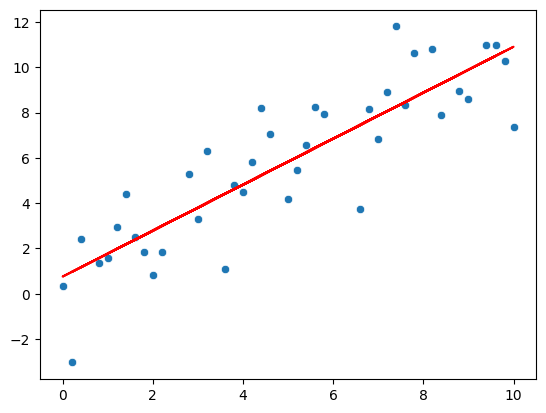

In [12]:
sns.scatterplot(x=X_train.reshape(-1), y=y_train)
plt.plot(X_train.reshape(-1), y_pred, 'r')
plt.show()

### 평가
- MSE(Mean Squared Error, 평균제곱오차)
- RMSE(Root Mean Squared Error, 평균 제곱근 오차)
- MAE(Mean Absolute Error, 평균절대오차)

In [13]:
from sklearn.metrics import mean_squared_error
# MSE
mse = mean_squared_error(y_train, y_pred)
mse

3.0476636063688796

In [14]:
# RMSE
rmse = np.sqrt(mse)
rmse

1.7457558839565397

In [15]:
from sklearn.metrics import mean_absolute_error
# MAE
mae = mean_absolute_error(y_train, y_pred)
mae

1.3631509148145355

### 예측

In [16]:
y_pred = lr.predict(X_test.reshape(-1, 1))
y_pred

array([ 9.49021413,  8.88085817, 10.0995701 ,  3.19353585,  5.6309597 ,
        7.05279028,  4.20912912,  7.25590894,  1.36546797,  6.84967163,
        3.39665451])

- **성능 평가**(RMSE)

In [17]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.7091067746164774

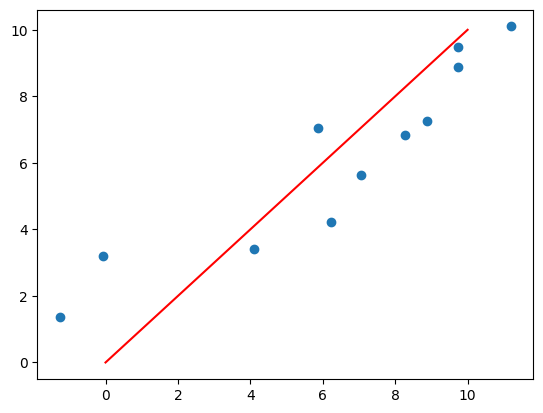

In [18]:
plt.scatter(y_test, y_pred)
plt.plot([0, 10], [0, 10], 'r')
plt.show()